In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [2]:
# load the data

train = pd.read_csv("C:\\Users\\SS1716\\OneDrive\\Desktop\\Capstone_project4\\Sales\\train.csv")

#Import Test Data
test=pd.read_csv("C:\\Users\\SS1716\\OneDrive\\Desktop\\Capstone_project4\\Sales\\test.csv")

# Import Store data set
stores = pd.read_csv("C:\\Users\\SS1716\\OneDrive\\Desktop\\Capstone_project4\\Sales\\stores.csv")

# Now import features data set
feature = pd.read_csv("C:\\Users\\SS1716\\OneDrive\\Desktop\\Capstone_project4\\Sales\\features.csv")

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Merge the data sets

## (train+Store+Feature)
## (test+Store+Feature)

In [3]:
# For Train data set
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)

#For test data set
test_bt = pd.merge(test,stores)
test = pd.merge(test_bt,feature)

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [6]:
print (train.info())
print ("*****************************************")
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
*******************

# Select only positive weekly sales

In [7]:
# only those values whose sales is positive. 
train = train[train['Weekly_Sales']>0]

### Data Description
### Training Data

In [8]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]

print (numeric_var_train)
print (cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [9]:
train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,150181.000000,110904.000000,136651.000000,134518.000000,150929.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,136749.732787,60.090599,3.360890,7247.821269,3330.146158,1441.736203,3384.782267,4629.531870,171.212496,7.960000
std,12.787236,30.508819,22729.492116,60993.084568,18.447857,0.458519,8293.028741,9460.395025,9631.968459,6295.136952,5960.171711,39.162445,1.863879
min,1.000000,1.000000,0.010000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2120.130000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7661.700000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000
75%,33.000000,74.000000,20271.265000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.445487,8.567000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


# Testing Data

In [10]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]

# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]

print (numeric_var_test)
print (cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [11]:
test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


# Correlation matrix

In [12]:
# Correlation for train data
train_corr=pd.DataFrame(train.corr())
train_corr.head(20)


,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024258,-0.085117,-0.000522,-0.182763,-0.050230,0.065321,-0.119676,-0.034993,-0.031475,-0.009991,-0.026777,-0.211261,0.208759
Dept,0.024258,1.000000,0.148749,0.000663,-0.002491,0.004727,0.003544,-0.002512,0.000018,0.001855,0.004176,0.000295,-0.007178,0.007787
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,0.244117,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
IsHoliday,-0.000522,0.000663,0.012843,1.000000,0.000797,-0.155775,-0.078155,-0.035632,0.334327,0.428364,-0.000459,-0.053696,-0.001933,0.010555
Size,-0.182763,-0.002491,0.244117,0.000797,1.000000,-0.058413,0.003632,0.345732,0.108843,0.048935,0.168266,0.304814,-0.003903,-0.068335
Temperature,-0.050230,0.004727,-0.002339,-0.155775,-0.058413,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.003632,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915
MarkDown1,-0.119676,-0.002512,0.085325,-0.035632,0.345732,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103
MarkDown2,-0.034993,0.000018,0.024565,0.334327,0.108843,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839
MarkDown3,-0.031475,0.001855,0.060304,0.428364,0.048935,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866


<AxesSubplot:>

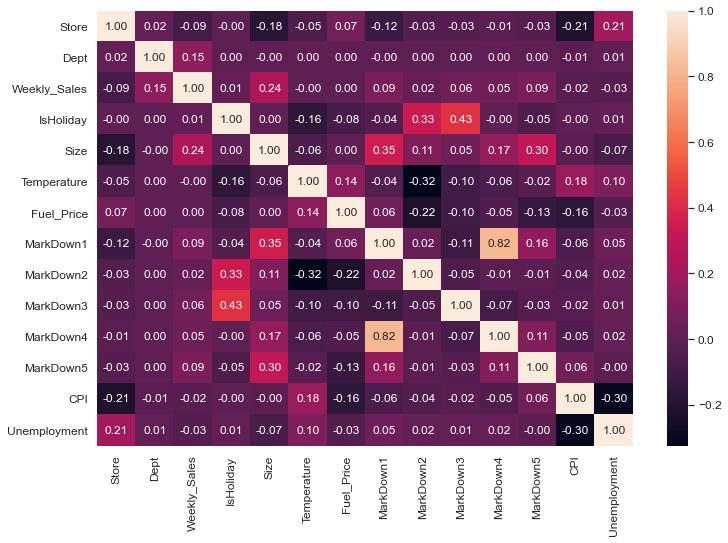

In [13]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot =True,fmt ='.2f')

In [14]:
# Correlation for test data
test_corr=pd.DataFrame(test.corr())
test_corr.head(10)

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


<AxesSubplot:>

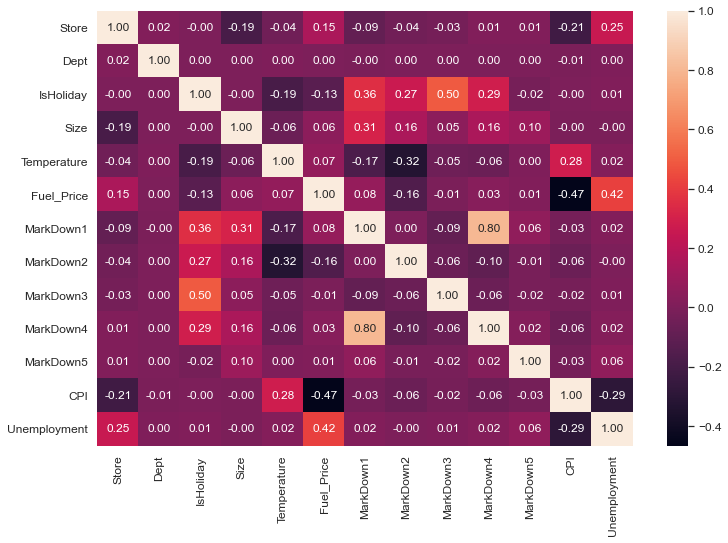

In [15]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(test.corr(),annot =True,fmt ='.2f')

In [16]:
train['Store'].value_counts(ascending=False)

13    10457
4     10267
10    10260
1     10226
2     10214
24    10210
34    10206
27    10196
6     10189
20    10173
32    10170
19    10114
31    10101
28    10099
41    10057
11    10033
23    10018
14    10005
40    10003
8      9883
15     9854
26     9844
39     9839
17     9812
18     9805
25     9768
7      9738
12     9665
22     9646
45     9610
21     9544
29     9424
16     9403
35     9402
3      9026
5      8978
9      8834
38     7351
37     7198
44     7142
30     7139
42     6907
43     6727
33     6478
36     6197
Name: Store, dtype: int64

# EDA

<AxesSubplot:ylabel='Frequency'>

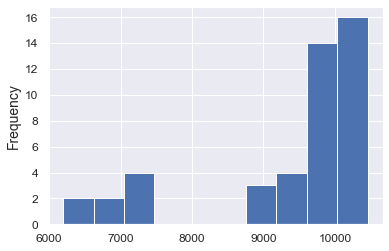

In [17]:
# Store wise sales plot
train['Store'].value_counts(ascending=False).plot(kind = 'hist',fig=(4,5))

In [18]:
train.Weekly_Sales

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 420212, dtype: float64

In [20]:
# AVerage weekly sales by store

<AxesSubplot:ylabel='Store'>

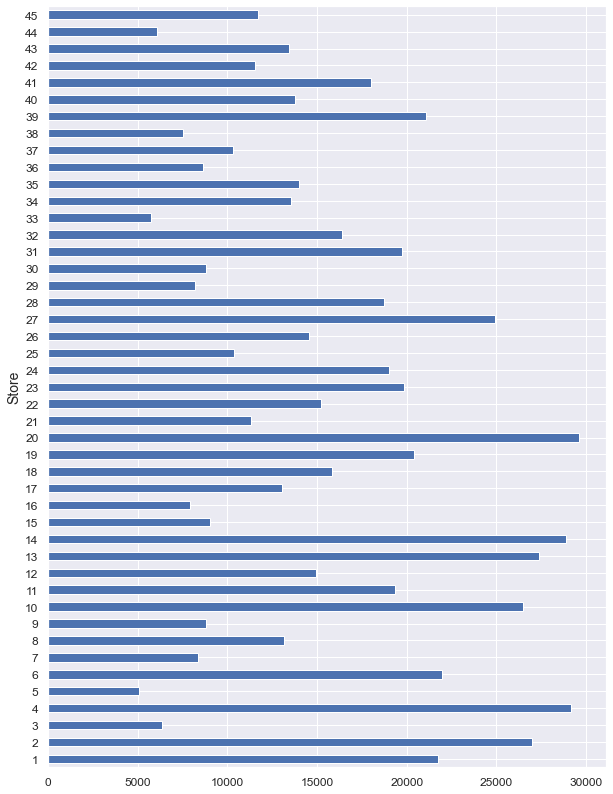

In [21]:
plt.figure(figsize=(10,14))
train.groupby(by='Store').mean()['Weekly_Sales'].plot(kind='barh')

# Sales Vs type

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Type'>

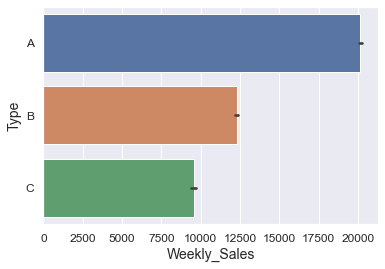

In [22]:
# Weekly sales Type wise
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

# Department Wise sales

<AxesSubplot:xlabel='Dept'>

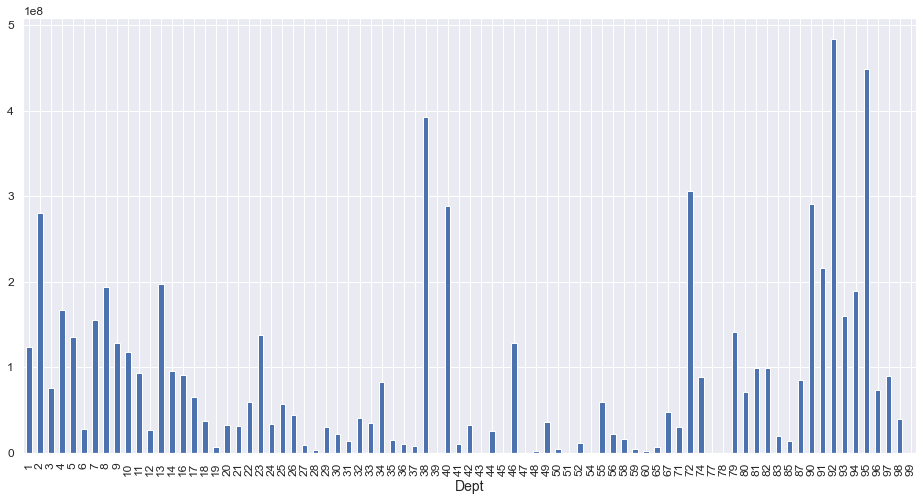

In [23]:
plt.figure(figsize=(16,8))
train.groupby(by='Dept').sum()['Weekly_Sales'].plot(kind='bar')

In [24]:
# Missing Values
print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


 # Mean

In [25]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

### Other Missing Value Treatment like Markdown, Imputing it with Zero(No Markdown)

In [26]:
train=train.fillna(0)
test=test.fillna(0)

In [27]:
# Recheck the missing values.

print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


# Outliers

In [28]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

<AxesSubplot:ylabel='Frequency'>

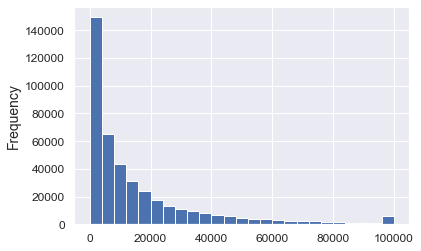

In [29]:
train.Weekly_Sales.plot.hist(bins=25)

#### Feature Extraction:In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Type          420212 non-null  object 
 6   Size          420212 non-null  int64  
 7   Temperature   420212 non-null  float64
 8   Fuel_Price    420212 non-null  float64
 9   MarkDown1     420212 non-null  float64
 10  MarkDown2     420212 non-null  float64
 11  MarkDown3     420212 non-null  float64
 12  MarkDown4     420212 non-null  float64
 13  MarkDown5     420212 non-null  float64
 14  CPI           420212 non-null  float64
 15  Unemployment  420212 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 67.8+ MB


# Date Feature

In [31]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [32]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

# For test data
test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

# Type Feature Details

In [33]:
print (train.Type.value_counts())
print ("*"*30)
print (test.Type.value_counts())

A    214961
B    162787
C     42464
Name: Type, dtype: int64
******************************
A    58713
B    44500
C    11851
Name: Type, dtype: int64


# IsHoliday Feature Details

In [34]:
print (train.IsHoliday.value_counts())
print ("*"*30)
print (test.IsHoliday.value_counts())

False    390652
True      29560
Name: IsHoliday, dtype: int64
******************************
False    106136
True       8928
Name: IsHoliday, dtype: int64


# Training and testing

In [35]:
train_test_data = [train, test]

### Converting Categorical Variable 'Type' into Numerical Variable For A=1 , B=2, C=3

In [36]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

### Creating Extra Holiday Variable.If that week comes under extra holiday then 1(=Yes) else 2(=No)

### Making New Holiday Variable Based on Given Data....

In [37]:
# For Train Data Set
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

#For Test Data set........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [38]:
# Change the isHoliday value depending on these new holidays...
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [39]:
# Count of holiday for train data
print (train.Christmas.value_counts())
print (train.Super_Bowl.value_counts())
print (train.Thanksgiving.value_counts())
print (train.Labour_Day.value_counts())

0    414303
1      5909
Name: Christmas, dtype: int64
0    411339
1      8873
Name: Super_Bowl, dtype: int64
0    414266
1      5946
Name: Thanksgiving, dtype: int64
0    411380
1      8832
Name: Labour_Day, dtype: int64


In [40]:
# Count of holiday for Test data
print (test.Christmas.value_counts())
print (test.Super_Bowl.value_counts())
print (test.Thanksgiving.value_counts())
print (test.Labour_Day.value_counts())

0    112076
1      2988
Name: Christmas, dtype: int64
0    112100
1      2964
Name: Super_Bowl, dtype: int64
0    112088
1      2976
Name: Thanksgiving, dtype: int64
0    115064
Name: Labour_Day, dtype: int64


In [41]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']

train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

In [42]:
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
5,1,6,2010-02-05,5749.03,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
6,1,7,2010-02-05,21084.08,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
7,1,8,2010-02-05,40129.01,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
8,1,9,2010-02-05,16930.99,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
9,1,10,2010-02-05,30721.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5


# Feature Selection
#### Droping irrevelent variable:
#### Since we have imputed markdown variables therefore we will not be removing the all markdown variables.
#### Removing MarkDown5 because its Highly Skewed.

In [43]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [44]:
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
5,1,6,2010-02-05,5749.03,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
6,1,7,2010-02-05,21084.08,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
7,1,8,2010-02-05,40129.01,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
8,1,9,2010-02-05,16930.99,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
9,1,10,2010-02-05,30721.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [45]:
test.head(10)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
2,1,3,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
3,1,4,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
4,1,5,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
5,1,6,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
6,1,7,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
7,1,8,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
8,1,9,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
9,1,10,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


In [46]:
# Converting all float var to int integer..
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)
        
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)

# Classification & MAE
# Define training and testing set

In [56]:
X = train.drop(['Weekly_Sales','Date'], axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [47]:
# #### train X= Exery thing except Weekly_Sales
# train_X=train.drop(['Weekly_Sales','Date'], axis=1)

# #### train Y= Only Weekly_Sales 
# train_y=train['Weekly_Sales'] 

# #### Test_X
# test_X=test.drop('Date',axis=1).copy()

# train_X.shape, train_y.shape, test_X.shape

((420212, 15), (420212,), (115064, 15))

# Linear Regression

In [59]:
## Methood 1..
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred_linear=clf.predict(X_test)
mae_linear=round( metrics.mean_absolute_error(y_test, y_pred_linear), 2)
print ('MAE score: '+str(mae_linear))

MAE score: 14048.58


In [49]:
import statsmodels.api as sm

In [50]:
train_X

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,False,1,151315,42,2,0,0,0,0,4,2,2010,5
1,1,2,False,1,151315,42,2,0,0,0,0,4,2,2010,5
2,1,3,False,1,151315,42,2,0,0,0,0,4,2,2010,5
3,1,4,False,1,151315,42,2,0,0,0,0,4,2,2010,5
4,1,5,False,1,151315,42,2,0,0,0,0,4,2,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,False,2,118221,58,3,4018,58,100,211,4,10,2012,26
421566,45,94,False,2,118221,58,3,4018,58,100,211,4,10,2012,26
421567,45,95,False,2,118221,58,3,4018,58,100,211,4,10,2012,26
421568,45,97,False,2,118221,58,3,4018,58,100,211,4,10,2012,26


In [51]:
train_y.shape

(420212,)

In [52]:
train_x = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X.astype(int)).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:13:13   Log-Likelihood:            -4.7484e+06
No. Observations:              420212   AIC:                         9.497e+06
Df Residuals:                  420197   BIC:                         9.497e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Store            -73.7792      2.435    -30.

# Random Forest

In [67]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_rf=clf.predict(X_test)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
print ("MAE:", mae_rf)

MAE: 1284.2214534226528


In [68]:
print ("MAE:", mae_rf)

MAE: 1284.2214534226528


# Decision Tree

In [69]:
clf=DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_pred_dt= clf.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,y_pred_dt)
print ("MAE:",mae_dt)

MAE: 1688.393084492462


# Comparing Models
#### Let's compare the MAE of all the regression models used above.

In [70]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [mae_linear, mae_rf, mae_dt]
    })

models.sort_values(by='Score', ascending=True)

,Model,Score
1,Random Forest,1284.221453
2,Decision Tree,1688.393084
0,Linear Regression,14048.580000
